In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
import sys, os

pd.set_option("display.max_columns", 500)
plt.style.use("ggplot")

In [2]:
files = os.listdir("data/")

dfs = []

for index, file in enumerate(files):
    
    open_df = pd.read_csv(f"data/{file}", on_bad_lines="skip", encoding="unicode_escape")
    
    # print(index + 1)
    dfs.append(open_df)
    

In [3]:
df = pd.concat(dfs)

In [4]:
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,LBH,LBD,LBA,SJH,SJD,SJA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,GBH,GBD,GBA,BSH,BSD,BSA,SBH,SBD,SBA,GB>2.5,GB<2.5,GBAHH,GBAHA,GBAH,LBAHH,LBAHA,LBAH,B365AH
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0.0,2.0,A,0.0,1.0,A,A Taylor,10.0,10.0,2.0,2.0,16.0,11.0,3.0,5.0,1.0,2.0,0.0,0.0,4.20,3.6,1.85,4.33,3.50,1.87,4.30,3.55,1.85,4.50,3.65,1.89,4.40,3.5,1.83,4.60,3.5,1.87,4.60,3.78,1.95,4.39,3.59,1.88,2.10,1.72,2.14,1.78,2.19,1.91,2.09,1.76,0.50,2.04,1.89,2.03,1.89,2.06,1.91,2.01,1.87,4.50,3.60,1.80,4.50,3.5,1.83,4.40,3.55,1.85,4.58,3.63,1.88,4.80,3.4,1.78,4.75,3.5,1.85,5.01,3.70,1.91,4.56,3.57,1.85,2.10,1.72,2.14,1.78,2.19,1.91,2.08,1.76,0.50,2.09,1.84,2.04,1.88,2.09,1.88,2.03,1.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,06/08/2022,12:30,Fulham,Liverpool,2.0,2.0,D,1.0,0.0,H,A Madley,9.0,11.0,3.0,4.0,7.0,9.0,4.0,4.0,2.0,0.0,0.0,0.0,11.00,6.0,1.25,10.00,5.75,1.28,12.00,5.75,1.27,11.20,6.22,1.28,12.00,5.5,1.27,13.00,6.0,1.25,13.00,6.40,1.31,10.99,6.05,1.28,1.50,2.62,1.50,2.70,1.54,2.76,1.48,2.63,1.75,1.90,2.03,1.91,2.00,1.92,2.04,1.89,1.99,11.00,5.75,1.28,9.25,6.0,1.29,11.00,5.50,1.30,10.50,6.50,1.29,11.00,5.5,1.27,11.50,6.0,1.29,11.95,6.93,1.30,10.33,6.20,1.28,1.50,2.62,1.49,2.77,1.51,3.00,1.47,2.73,1.75,1.90,2.03,1.91,2.02,2.01,2.06,1.89,1.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2.0,0.0,H,1.0,0.0,H,P Bankes,7.0,15.0,3.0,2.0,18.0,16.0,5.0,5.0,3.0,3.0,0.0,0.0,3.75,3.5,2.00,3.75,3.40,2.00,3.65,3.45,2.05,3.93,3.58,2.04,3.75,3.3,2.05,3.75,3.3,2.00,4.00,3.66,2.10,3.80,3.50,2.04,2.00,1.80,2.10,1.81,2.10,1.87,2.03,1.80,0.50,1.87,2.06,1.88,2.04,1.88,2.07,1.85,2.04,4.00,3.50,1.95,3.90,3.4,1.95,3.85,3.45,2.00,4.09,3.59,2.00,4.00,3.4,1.95,4.10,3.4,2.00,4.25,3.63,2.06,3.99,3.49,2.00,2.10,1.72,2.13,1.79,2.24,1.81,2.10,1.76,0.50,1.93,2.00,1.93,2.00,1.94,2.04,1.88,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,06/08/2022,15:00,Leeds,Wolves,2.0,1.0,H,1.0,1.0,D,R Jones,12.0,15.0,4.0,6.0,13.0,9.0,6.0,4.0,2.0,0.0,0.0,0.0,2.25,3.4,3.20,2.30,3.30,2.95,2.30,3.30,3.15,2.39,3.33,3.30,2.25,3.3,3.20,2.30,3.2,3.10,2.42,3.54,3.30,2.34,3.34,3.18,2.05,1.85,2.09,1.83,2.11,1.87,2.03,1.81,-0.25,2.05,1.88,2.04,1.89,2.06,1.90,2.01,1.87,2.37,3.30,3.00,2.40,3.3,2.75,2.45,3.30,2.95,2.45,3.44,3.09,2.40,3.3,2.90,2.40,3.4,3.00,2.50,3.55,3.18,2.43,3.36,3.02,1.95,1.95,1.96,1.94,2.09,1.96,1.96,1.87,-0.25,2.08,1.85,2.10,1.84,2.14,1.87,2.08,1.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,2.0,0.0,H,0.0,0.0,D,S Hooper,23.0,5.0,10.0,0.0,9.0,14.0,11.0,1.0,0.0,3.0,0.0,0.0,1.66,3.8,5.25,1.65,3.80,5.50,1.65,3.80,5.50,1.71,3.74,5.83,1.67,3.7,5.25,1.62,3.7,5.50,1.72,3.96,6.00,1.67,3.80,5.57,2.05,1.85,2.10,1.81,2.10,1.86,2.03,1.81,-0.75,1.87,2.06,1.92,2.01,1.92,2.08,1.86,2.02,1.53,4.00,6.00,1.58,3.9,6.00,1.63,3.8

In [82]:
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year

In [5]:
total_goals = df["FTHG"] + df["FTAG"]

In [49]:
probs = (total_goals.value_counts() / total_goals.shape[0]).sort_index()
poisson = [sp.poisson.pmf(i, mu=total_goals.mean()) for i in range(0, int(total_goals.max() + 1))]

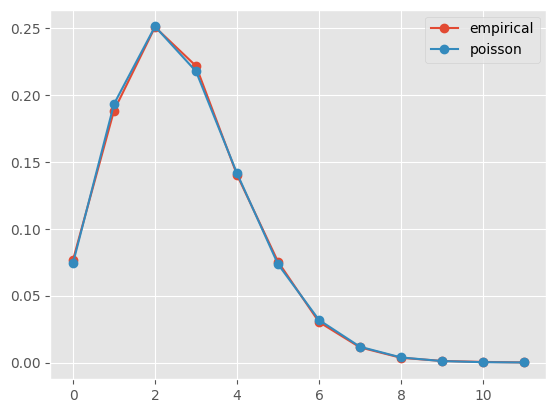

In [48]:
plt.plot(probs.T, marker="o", label="empirical")
plt.plot(poisson, marker="o", label="poisson")#
plt.legend()

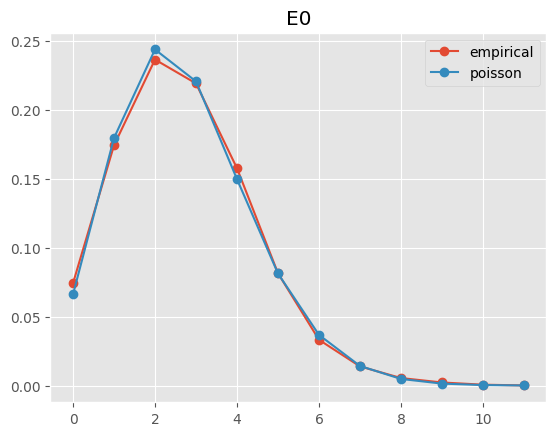

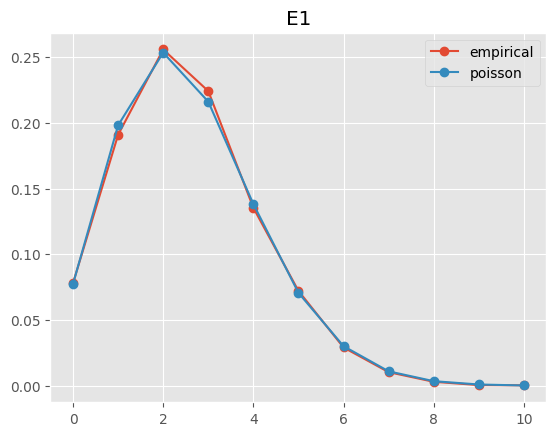

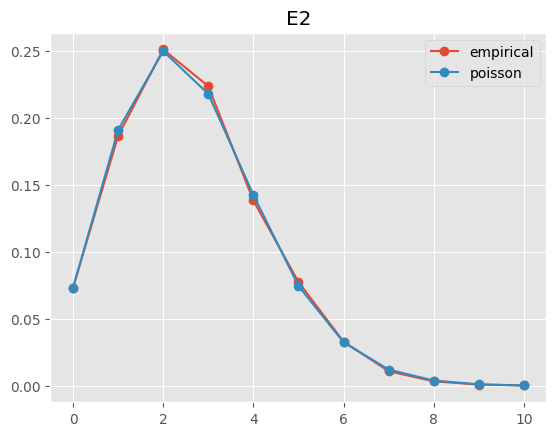

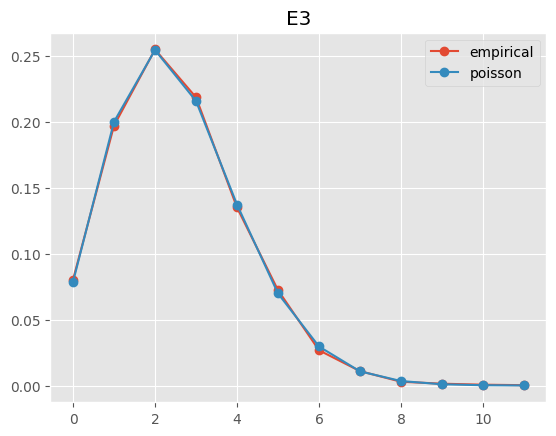

In [57]:
for league in df.dropna(subset="Div")["Div"].unique():
    
    total_goals = df[df["Div"] == league]["FTHG"] + df[df["Div"] == league]["FTAG"]
    
    probs = (total_goals.value_counts() / total_goals.shape[0]).sort_index()
    poisson = [sp.poisson.pmf(i, mu=total_goals.mean()) for i in range(0, int(total_goals.max() + 1))]

    plt.title(league)
    plt.plot(probs.T, marker="o", label="empirical")
    plt.plot(poisson, marker="o", label="poisson")
    plt.legend()
    
    plt.show()

In [58]:
df["FTG"] = df["FTHG"] + df["FTAG"]

In [122]:
league_probs = df.groupby(["Div"]).apply(lambda x: (x["FTG"].value_counts() / x.shape[0]).sort_index()).unstack().T

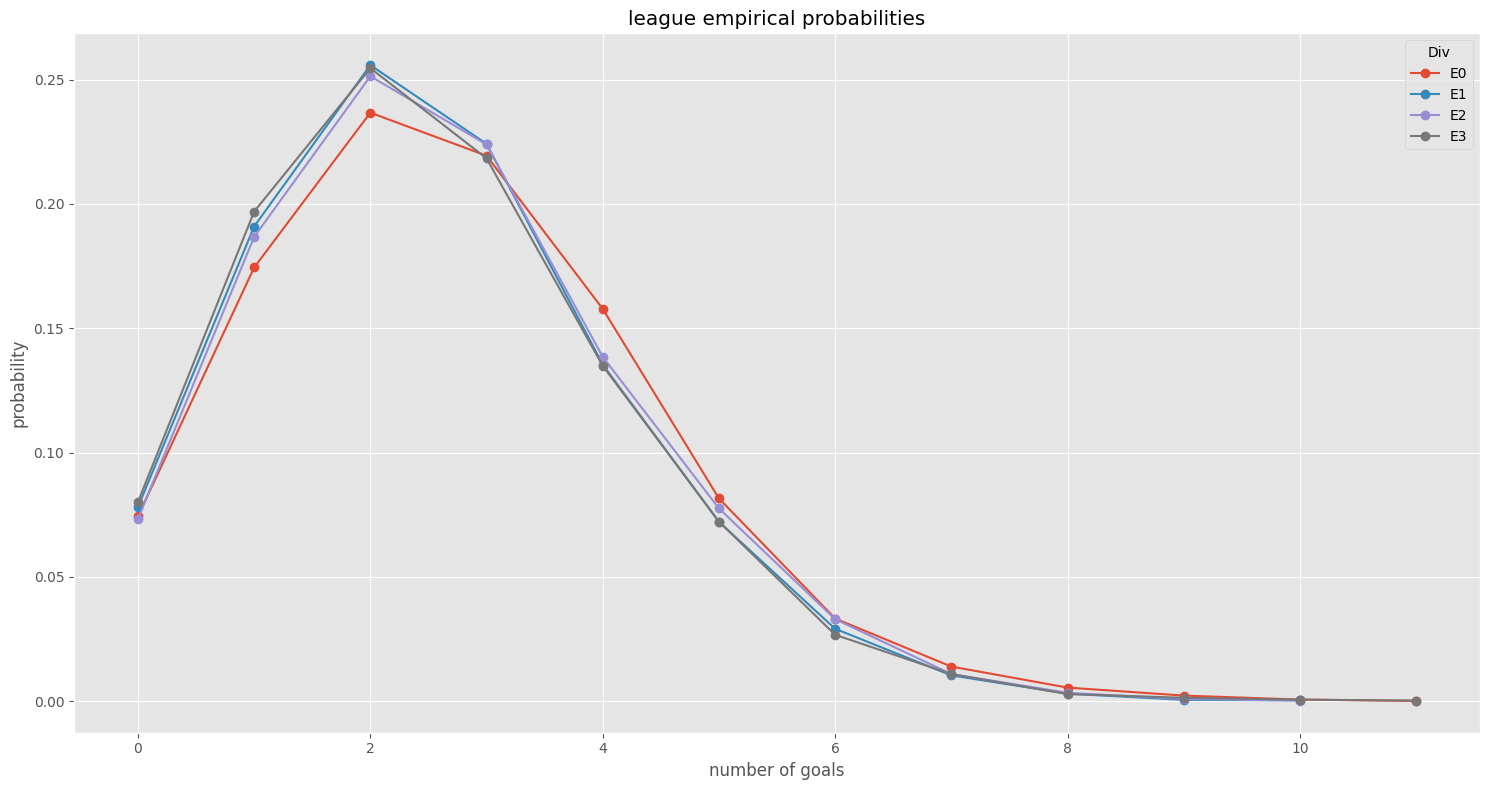

In [123]:
league_probs.plot(marker="o", title="league empirical probabilities",ylabel="probability", xlabel="number of goals", figsize=(15, 8))
plt.tight_layout()

In [124]:
year_probs = df[df["Div"] == "E0"].groupby(["Year"]).apply(lambda x: (x["FTG"].value_counts() / x.shape[0]).sort_index()).unstack().T

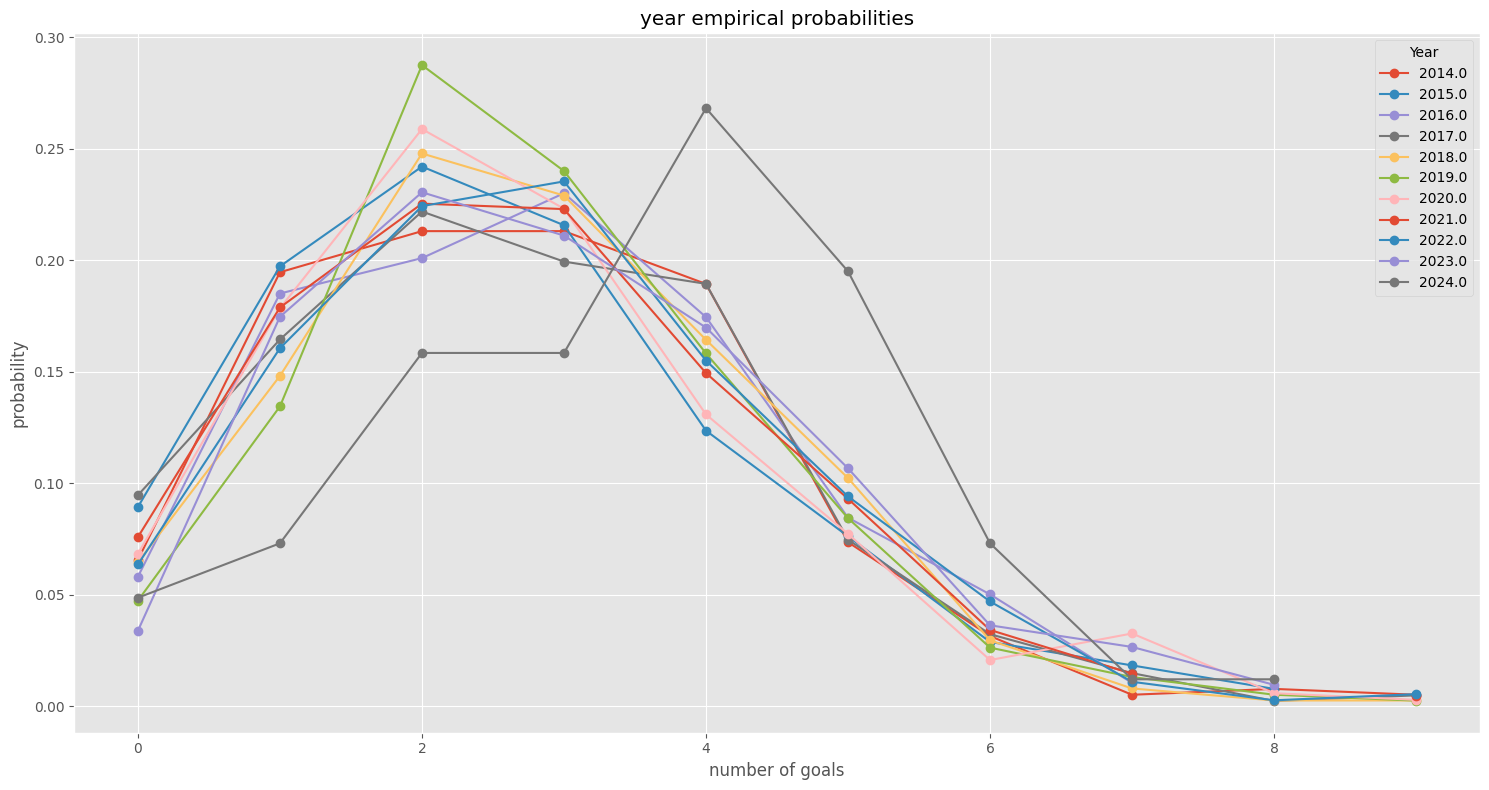

In [125]:
year_probs.iloc[:, 10:].plot(marker="o", title="year empirical probabilities", ylabel="probability", xlabel="number of goals", figsize=(15, 8))
plt.tight_layout()

In [126]:
top_teams = df[df["Div"] == "E0"].iloc[:, :-3]["HomeTeam"].value_counts().head(10).index

In [127]:
team_probs = df[df["HomeTeam"].isin(top_teams)].groupby(["HomeTeam"]).apply(lambda x: (x["FTG"].value_counts() / x.shape[0]).sort_index()).unstack().T

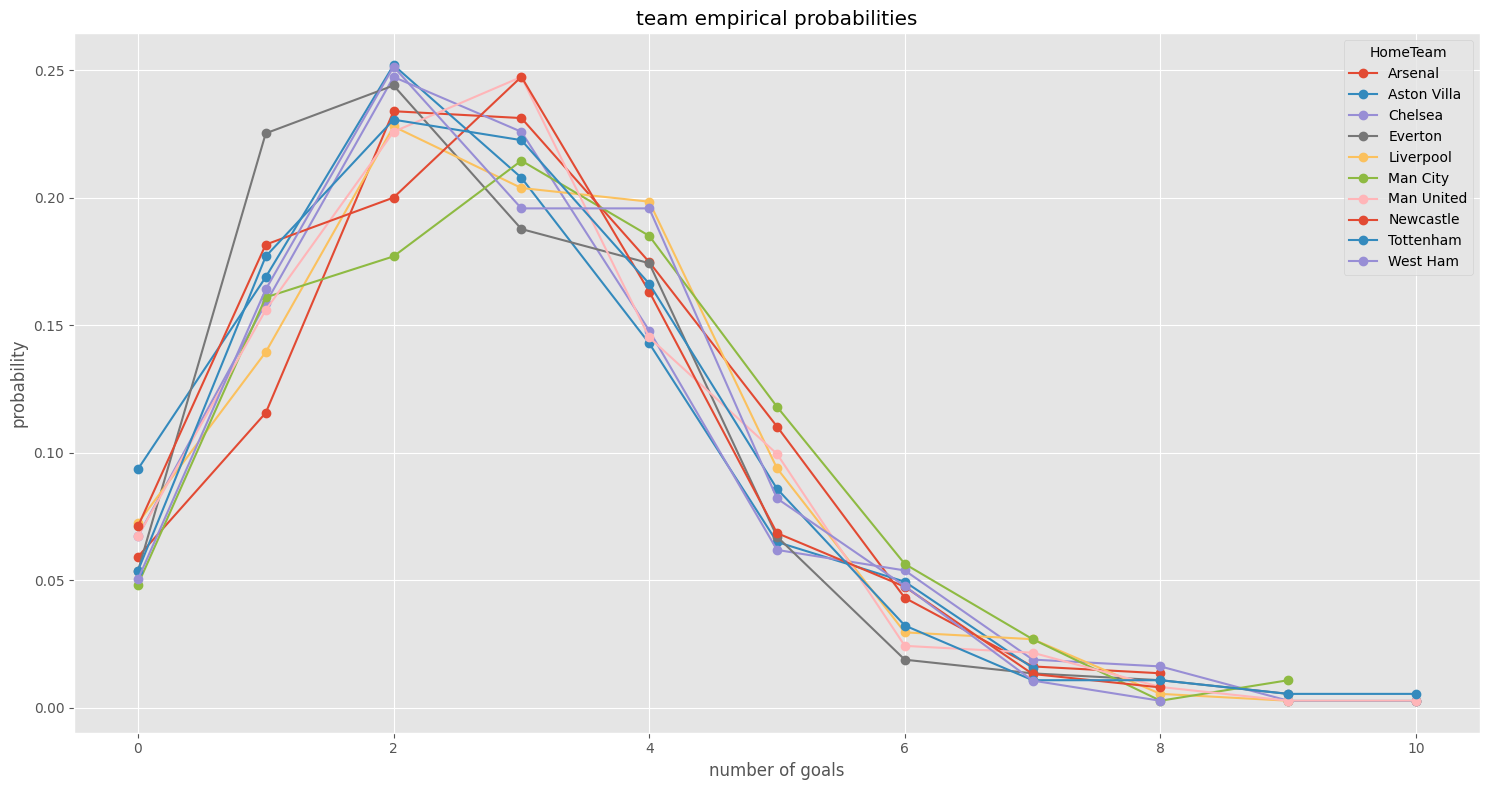

In [128]:
team_probs.plot(marker="o", title="team empirical probabilities", ylabel="probability", xlabel="number of goals", figsize=(15, 8))
plt.tight_layout()

In [133]:
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,LBH,LBD,LBA,SJH,SJD,SJA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,GBH,GBD,GBA,BSH,BSD,BSA,SBH,SBD,SBA,GB>2.5,GB<2.5,GBAHH,GBAHA,GBAH,LBAHH,LBAHA,LBAH,B365AH,FTG,Year
0,E0,2022-05-08,20:00,Crystal Palace,Arsenal,0.0,2.0,A,0.0,1.0,A,A Taylor,10.0,10.0,2.0,2.0,16.0,11.0,3.0,5.0,1.0,2.0,0.0,0.0,4.20,3.6,1.85,4.33,3.50,1.87,4.30,3.55,1.85,4.50,3.65,1.89,4.40,3.5,1.83,4.60,3.5,1.87,4.60,3.78,1.95,4.39,3.59,1.88,2.10,1.72,2.14,1.78,2.19,1.91,2.09,1.76,0.50,2.04,1.89,2.03,1.89,2.06,1.91,2.01,1.87,4.50,3.60,1.80,4.50,3.5,1.83,4.40,3.55,1.85,4.58,3.63,1.88,4.80,3.4,1.78,4.75,3.5,1.85,5.01,3.70,1.91,4.56,3.57,1.85,2.10,1.72,2.14,1.78,2.19,1.91,2.08,1.76,0.50,2.09,1.84,2.04,1.88,2.09,1.88,2.03,1.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2022.0
1,E0,2022-06-08,12:30,Fulham,Liverpool,2.0,2.0,D,1.0,0.0,H,A Madley,9.0,11.0,3.0,4.0,7.0,9.0,4.0,4.0,2.0,0.0,0.0,0.0,11.00,6.0,1.25,10.00,5.75,1.28,12.00,5.75,1.27,11.20,6.22,1.28,12.00,5.5,1.27,13.00,6.0,1.25,13.00,6.40,1.31,10.99,6.05,1.28,1.50,2.62,1.50,2.70,1.54,2.76,1.48,2.63,1.75,1.90,2.03,1.91,2.00,1.92,2.04,1.89,1.99,11.00,5.75,1.28,9.25,6.0,1.29,11.00,5.50,1.30,10.50,6.50,1.29,11.00,5.5,1.27,11.50,6.0,1.29,11.95,6.93,1.30,10.33,6.20,1.28,1.50,2.62,1.49,2.77,1.51,3.00,1.47,2.73,1.75,1.90,2.03,1.91,2.02,2.01,2.06,1.89,1.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2022.0
2,E0,2022-06-08,15:00,Bournemouth,Aston Villa,2.0,0.0,H,1.0,0.0,H,P Bankes,7.0,15.0,3.0,2.0,18.0,16.0,5.0,5.0,3.0,3.0,0.0,0.0,3.75,3.5,2.00,3.75,3.40,2.00,3.65,3.45,2.05,3.93,3.58,2.04,3.75,3.3,2.05,3.75,3.3,2.00,4.00,3.66,2.10,3.80,3.50,2.04,2.00,1.80,2.10,1.81,2.10,1.87,2.03,1.80,0.50,1.87,2.06,1.88,2.04,1.88,2.07,1.85,2.04,4.00,3.50,1.95,3.90,3.4,1.95,3.85,3.45,2.00,4.09,3.59,2.00,4.00,3.4,1.95,4.10,3.4,2.00,4.25,3.63,2.06,3.99,3.49,2.00,2.10,1.72,2.13,1.79,2.24,1.81,2.10,1.76,0.50,1.93,2.00,1.93,2.00,1.94,2.04,1.88,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2022.0
3,E0,2022-06-08,15:00,Leeds,Wolves,2.0,1.0,H,1.0,1.0,D,R Jones,12.0,15.0,4.0,6.0,13.0,9.0,6.0,4.0,2.0,0.0,0.0,0.0,2.25,3.4,3.20,2.30,3.30,2.95,2.30,3.30,3.15,2.39,3.33,3.30,2.25,3.3,3.20,2.30,3.2,3.10,2.42,3.54,3.30,2.34,3.34,3.18,2.05,1.85,2.09,1.83,2.11,1.87,2.03,1.81,-0.25,2.05,1.88,2.04,1.89,2.06,1.90,2.01,1.87,2.37,3.30,3.00,2.40,3.3,2.75,2.45,3.30,2.95,2.45,3.44,3.09,2.40,3.3,2.90,2.40,3.4,3.00,2.50,3.55,3.18,2.43,3.36,3.02,1.95,1.95,1.96,1.94,2.09,1.96,1.96,1.87,-0.25,2.08,1.85,2.10,1.84,2.14,1.87,2.08,1.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2022.0
4,E0,2022-06-08,15:00,Newcastle,Nott'm Forest,2.0,0.0,H,0.0,0.0,D,S Hooper,23.0,5.0,10.0,0.0,9.0,14.0,11.0,1.0,0.0,3.0,0.0,0.0,1.66,3.8,5.25,1.65,3.80,5.50,1.65,3.80,5.50,1.71,3.74,5.83,1.67,3.7,5.25,1.62,3.7,5.50,1.72,3.96,6.00,1.67,3.80,5.57,2.05,1.85,2.10,1.81,2.10,1.86,2.03,1.81,-0.75,1.87,2.06,1.92,2.01,1.92

In [179]:
team_performance_ha = {}
for team in df["HomeTeam"].unique():
    
    # home w/l/d %
    home_matches = df[df["HomeTeam"] == team]["FTR"].value_counts().sum()
    home_perf = df[df["HomeTeam"] == team]["FTR"].value_counts() / home_matches
    
    # away w/l/d %
    away_matches = df[df["AwayTeam"] == team]["FTR"].value_counts().sum()
    away_perf = df[df["AwayTeam"] == team]["FTR"].value_counts() / away_matches
    
    team_performance_ha[team] = {
        "home_perf": home_perf,
        "away_perf": away_perf
    }

In [189]:
team_performance_ha["Chelsea"]

{'home_perf': H    0.634409
 D    0.241935
 A    0.123656
 Name: FTR, dtype: float64,
 'away_perf': A    0.529570
 H    0.268817
 D    0.201613
 Name: FTR, dtype: float64}